In [1]:
# detect the version of the python

import sys
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [2]:
# Import necessary packages

import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [3]:
# read the data

df_init= pd.read_csv('census2003_2023.csv')
df_init_copy= df_init.copy()
df_init.head()

,Country.Name,Region,Subregion,Year,Median.age..both.sexes,Median.age..females,Median.age..males,Total.Fertility.Rate,Infant.Mortality.Rate..Both.Sexes,Infant.Mortality.Rate..Males,Infant.Mortality.Rate..Females
0,Afghanistan,Asia,South-Central Asia,2003,16.2,16.2,16.2,6.58,141.3,150.0,132.2
1,Albania,Europe,Southern Europe,2003,27.1,27.7,26.3,2.07,17.1,18.4,15.8
2,Algeria,Africa,Northern Africa,2003,23.2,23.4,23.0,2.38,35.5,38.3,32.6
3,American Samoa,Oceania,Polynesia,2003,21.5,21.8,21.3,3.93,12.7,15.8,9.4
4,Andorra,Europe,Southern Europe,2003,37.7,37.4,38.0,1.29,3.6,3.8,3.5


In [4]:
# data info

df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Country.Name                       453 non-null    object
 1   Region                             453 non-null    object
 2   Subregion                          453 non-null    object
 3   Year                               453 non-null    int64 
 4   Median.age..both.sexes             453 non-null    object
 5   Median.age..females                453 non-null    object
 6   Median.age..males                  453 non-null    object
 7   Total.Fertility.Rate               453 non-null    object
 8   Infant.Mortality.Rate..Both.Sexes  453 non-null    object
 9   Infant.Mortality.Rate..Males       453 non-null    object
 10  Infant.Mortality.Rate..Females     453 non-null    object
dtypes: int64(1), object(10)
memory usage: 39.1+ KB


In [5]:
# null values of the data

df_init.isnull().sum()

Country.Name                         0
Region                               0
Subregion                            0
Year                                 0
Median.age..both.sexes               0
Median.age..females                  0
Median.age..males                    0
Total.Fertility.Rate                 0
Infant.Mortality.Rate..Both.Sexes    0
Infant.Mortality.Rate..Males         0
Infant.Mortality.Rate..Females       0
dtype: int64

In [6]:
df_init[df_init['Median.age..both.sexes' ]== '--']

,Country.Name,Region,Subregion,Year,Median.age..both.sexes,Median.age..females,Median.age..males,Total.Fertility.Rate,Infant.Mortality.Rate..Both.Sexes,Infant.Mortality.Rate..Males,Infant.Mortality.Rate..Females
117,Libya,Africa,Northern Africa,2003,--,--,--,--,--,--,--
162,Puerto Rico,Americas,Caribbean,2003,--,--,--,--,--,--,--
189,South Sudan,Africa,Northern Africa,2003,--,--,--,--,--,--,--
192,Sudan,Africa,Northern Africa,2003,--,--,--,--,--,--,--
196,Syria,Asia,Western Asia,2003,--,--,--,--,--,--,--
214,United States,Americas,Northern America,2003,--,--,--,--,--,--,--
440,United States,Americas,Northern America,2023,--,--,--,1.84,5.1,5.5,4.7


In [7]:
# replacing the empty cells with null values, so that they can be dropped

df_init.replace('--', np.nan, inplace= True)
df_init.isnull().sum()

Country.Name                         0
Region                               0
Subregion                            0
Year                                 0
Median.age..both.sexes               7
Median.age..females                  7
Median.age..males                    7
Total.Fertility.Rate                 6
Infant.Mortality.Rate..Both.Sexes    6
Infant.Mortality.Rate..Males         6
Infant.Mortality.Rate..Females       6
dtype: int64

In [8]:
# dropping the null values

df_init.dropna(inplace= True)
df_init.isnull().sum()

Country.Name                         0
Region                               0
Subregion                            0
Year                                 0
Median.age..both.sexes               0
Median.age..females                  0
Median.age..males                    0
Total.Fertility.Rate                 0
Infant.Mortality.Rate..Both.Sexes    0
Infant.Mortality.Rate..Males         0
Infant.Mortality.Rate..Females       0
dtype: int64

In [9]:
# resetting the index after dropping nulls

df_init.reset_index(inplace=True)
df_init.drop('index', axis= 1,  inplace=True)

In [10]:
# showing the dtypes of the data
df_init.dtypes

Country.Name                         object
Region                               object
Subregion                            object
Year                                  int64
Median.age..both.sexes               object
Median.age..females                  object
Median.age..males                    object
Total.Fertility.Rate                 object
Infant.Mortality.Rate..Both.Sexes    object
Infant.Mortality.Rate..Males         object
Infant.Mortality.Rate..Females       object
dtype: object

In [11]:
df_init.head()

,Country.Name,Region,Subregion,Year,Median.age..both.sexes,Median.age..females,Median.age..males,Total.Fertility.Rate,Infant.Mortality.Rate..Both.Sexes,Infant.Mortality.Rate..Males,Infant.Mortality.Rate..Females
0,Afghanistan,Asia,South-Central Asia,2003,16.2,16.2,16.2,6.58,141.3,150.0,132.2
1,Albania,Europe,Southern Europe,2003,27.1,27.7,26.3,2.07,17.1,18.4,15.8
2,Algeria,Africa,Northern Africa,2003,23.2,23.4,23.0,2.38,35.5,38.3,32.6
3,American Samoa,Oceania,Polynesia,2003,21.5,21.8,21.3,3.93,12.7,15.8,9.4
4,Andorra,Europe,Southern Europe,2003,37.7,37.4,38.0,1.29,3.6,3.8,3.5


In [12]:
df_init.columns

Index(['Country.Name', 'Region', 'Subregion', 'Year', 'Median.age..both.sexes',
       'Median.age..females', 'Median.age..males', 'Total.Fertility.Rate',
       'Infant.Mortality.Rate..Both.Sexes', 'Infant.Mortality.Rate..Males',
       'Infant.Mortality.Rate..Females'],
      dtype='object')

In [13]:
# chaning the data column names for a better and easier understading and use

df_init.columns= ['Country.Name', 'Region', 'Subregion', 'Year',
       'Median_age_both_sexes', 'Median_age_females', 'Median_age_males',
       'Total_Fertility_Rate', 'Infant_Mortality_Rate_Both_Sexes',
       'Infant_Mortality_Rate_Males', 'Infant_Mortality_Rate_Females']

In [14]:
# converting the object dtype variables into numeric type

columns_converting= ['Median_age_both_sexes', 'Median_age_females', 'Median_age_males',
       'Total_Fertility_Rate', 'Infant_Mortality_Rate_Both_Sexes',
       'Infant_Mortality_Rate_Males', 'Infant_Mortality_Rate_Females']

for column in columns_converting:
    df_init[column]= pd.to_numeric(df_init[column])

In [15]:
# selecting the data fir the year 2023

df= df_init[df_init['Year']== 2023]

In [16]:
df['Region'].unique()

array(['Europe', 'Africa', 'Oceania', 'Americas', 'Asia'], dtype=object)

In [17]:
# selecting numerical variables and their descriptive statistics

cols= ['Region', 'Median_age_females', 'Median_age_males', 'Infant_Mortality_Rate_Males',
       'Infant_Mortality_Rate_Females',  'Total_Fertility_Rate']

df1= df[cols]
df1.groupby('Region').describe()

Median_age_females                                                 \
                      count       mean       std   min    25%   50%    75%   
Region                                                                       
Africa                 55.0  22.616364  6.070809  15.5  19.15  21.0  23.65   
Americas               49.0  35.818367  6.337378  24.9  31.30  35.6  40.00   
Asia                   51.0  32.182353  7.376658  19.5  28.10  31.2  36.00   
Europe                 49.0  44.465306  4.236033  32.0  42.00  44.8  47.20   
Oceania                21.0  30.976190  5.424381  21.8  27.30  30.0  35.10   

               Median_age_males             ... Infant_Mortality_Rate_Females  \
           max            count       mean  ...                           75%   
Region                                      ...                                 
Africa    44.9             55.0  21.703636  ...                         47.90   
Americas  51.2             49.0  34.071429  ...                         12.50   
Asia      50.9             51.0  31.239216  ...                         20.75   
Europe    57.6             49.0  41.485714  ...                          5.00   
Oceania   41.0             21.0  29.709524  ...                         15.60   

               Total_Fertility_Rate                                         \
           max                count      mean       std   min    25%   50%   
Region                                                                       
Africa    75.6                 55.0  3.755273  1.182826  1.35  2.955  3.66   
Americas  35.1                 49.0  1.878776  0.291724  1.25  1.720  1.88   
Asia      48.1                 51.0  2.143137  0.704359  1.09  1.695  1.96   
Europe    23.4                 49.0  1.597551  0.200443  1.22  1.510  1.59   
Oceania   30.1                 21.0  2.344286  0.524486  1.70  1.860  2.23   

                       
            75%   max  
Region                 
Africa    4.555  6.73  
Americas  2.050  2.57  
Asia      2.630  4.09  
Europe    1.690  2.28  
Oceania   2.700  3.85  

[5 rows x 40 columns]

## Task 1:

In [18]:
# grouping the data by region and extracting their statistics

grouped = df.groupby('Region')

statistics = grouped.agg({
    'Median_age_both_sexes': ['mean', 'median', 'std'],
    'Infant_Mortality_Rate_Both_Sexes': ['mean', 'median', 'std'],
    'Total_Fertility_Rate': ['mean', 'median', 'std']
})

statistics.round(2)

Median_age_both_sexes              Infant_Mortality_Rate_Both_Sexes  \
                          mean median   std                             mean   
Region                                                                         
Africa                   22.16   20.5  5.98                            41.07   
Americas                 34.95   35.0  6.11                            12.14   
Asia                     31.83   31.3  6.98                            16.78   
Europe                   42.96   43.7  3.85                             4.81   
Oceania                  30.30   29.4  5.24                            14.10   

                       Total_Fertility_Rate               
         median    std                 mean median   std  
Region                                                    
Africa     38.3  18.31                 3.76   3.66  1.18  
Americas   11.0   6.96                 1.88   1.88  0.29  
Asia       14.6  11.74                 2.14   1.96  0.70  
Europe      3.6   3.81                 1.60   1.59  0.20  
Oceania    12.1   9.08                 2.34   2.23  0.52

In [19]:
# extracing the mean of the data grouped by region

cols1= ['Region', 'Median_age_females', 'Median_age_males',
        'Infant_Mortality_Rate_Males', 'Infant_Mortality_Rate_Females',
       'Infant_Mortality_Rate_Both_Sexes', 'Total_Fertility_Rate']

df2= df[cols1]
grouped_data= df2.groupby('Region').mean()
grouped_data

,Median_age_females,Median_age_males,Infant_Mortality_Rate_Males,Infant_Mortality_Rate_Females,Infant_Mortality_Rate_Both_Sexes,Total_Fertility_Rate
Region,,,,,,
Africa,22.616364,21.703636,45.320000,36.681818,41.070909,3.755273
Americas,35.818367,34.071429,13.697959,10.512245,12.138776,1.878776
Asia,32.182353,31.239216,18.527451,14.945098,16.782353,2.143137
Europe,44.465306,41.485714,5.253061,4.348980,4.810204,1.597551
Oceania,30.976190,29.709524,16.085714,12.014286,14.100000,2.344286


In [20]:
grouped_data.reset_index(inplace= True)
grouped_data

,Region,Median_age_females,Median_age_males,Infant_Mortality_Rate_Males,Infant_Mortality_Rate_Females,Infant_Mortality_Rate_Both_Sexes,Total_Fertility_Rate
0,Africa,22.616364,21.703636,45.320000,36.681818,41.070909,3.755273
1,Americas,35.818367,34.071429,13.697959,10.512245,12.138776,1.878776
2,Asia,32.182353,31.239216,18.527451,14.945098,16.782353,2.143137
3,Europe,44.465306,41.485714,5.253061,4.348980,4.810204,1.597551
4,Oceania,30.976190,29.709524,16.085714,12.014286,14.100000,2.344286


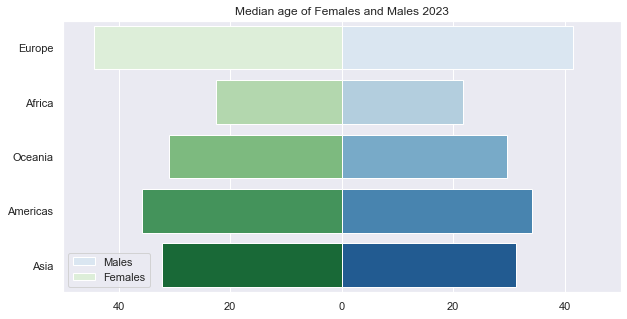

In [21]:
# plotting a 2-sided barplot to show median age for males and females over all continents

regions= ['Europe', 'Africa', 'Oceania', 'Americas', 'Asia']
x_M = grouped_data['Median_age_males'] 
x_F = grouped_data['Median_age_females'] * -1

plt.figure(figsize= (10,5))
ax1 = sns.barplot(x=x_M, y=grouped_data['Region'],  order=regions, palette="Blues", label= 'Males')
ax2 = sns.barplot(x=x_F, y=grouped_data['Region'], order=regions, palette="Greens", label= 'Females')
plt.title("Median age of Females and Males 2023")
plt.legend()
ticks = ax2.get_xticks()
ax2.set_xticks(ticks)
ax2.set_xticklabels([int(abs(x)) for x in ticks])
plt.xlabel('')
plt.ylabel('')
ax1.set_xlim(-50, 50)
plt.savefig('Median_Age.pdf')

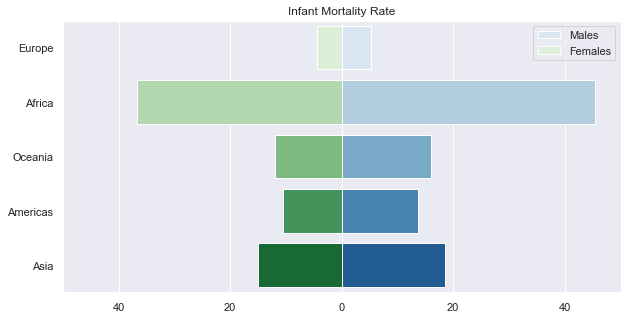

In [22]:
# plotting a 2-sided barplot to show infant mortality rate for males and females over all continents

regions= ['Europe', 'Africa', 'Oceania', 'Americas', 'Asia']
x_M = grouped_data['Infant_Mortality_Rate_Males'] 
x_F = grouped_data['Infant_Mortality_Rate_Females'] * -1

plt.figure(figsize= (10,5))
ax1 = sns.barplot(x=x_M, y=grouped_data['Region'],  order=regions, palette="Blues", label= 'Males')
ax2 = sns.barplot(x=x_F, y=grouped_data['Region'], order=regions, palette="Greens", label= 'Females')
plt.title("Infant Mortality Rate")
plt.legend()
ticks = ax2.get_xticks()
ax2.set_xticks(ticks)
ax2.set_xticklabels([int(abs(x)) for x in ticks])
plt.xlabel('')
plt.ylabel('')
ax1.set_xlim(-50, 50);


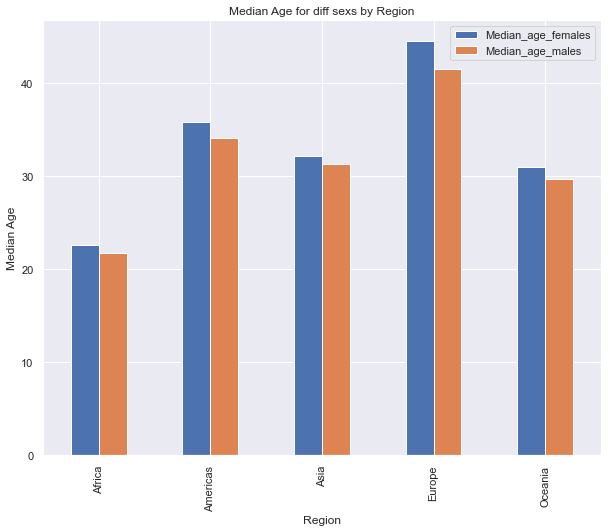

In [23]:
# another barplot for median age males and females by region

grouped_data[['Region', 'Median_age_females', 'Median_age_males']].plot(kind= 'bar', x= 'Region', figsize= (10, 8),
                  xlabel= 'Region', ylabel= 'Median Age',
                  title= 'Median Age for diff sexs by Region');

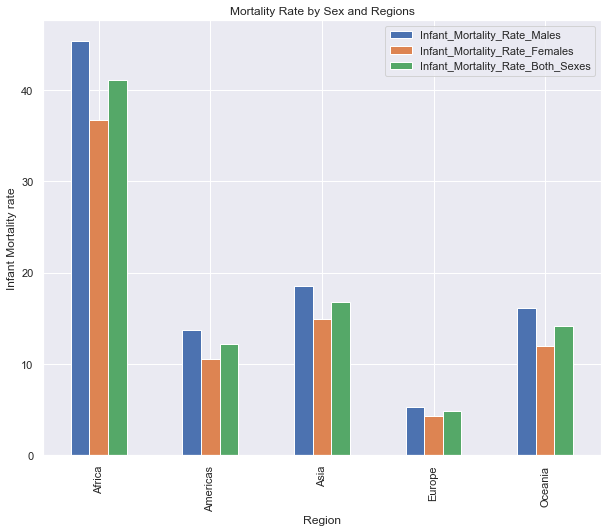

In [24]:
# a barplot for infant mortality rate for males and females by region

grouped_data[['Region','Infant_Mortality_Rate_Males', 'Infant_Mortality_Rate_Females', 'Infant_Mortality_Rate_Both_Sexes']].plot(kind= 'bar', x= 'Region', figsize= (10, 8),
                  xlabel= 'Region', ylabel= 'Infant Mortality rate',
                  title= 'Mortality Rate by Sex and Regions');

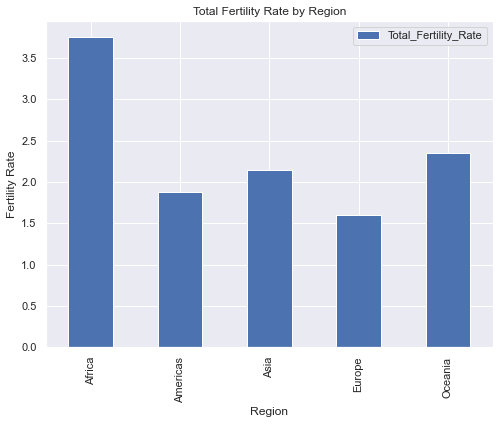

In [25]:
# barplot for total mortality rate by region

grouped_data[['Region', 'Total_Fertility_Rate']].plot(kind= 'bar', x= 'Region', figsize= (8, 6),
                  xlabel= 'Region', ylabel= 'Fertility Rate',
                  title= 'Total Fertility Rate by Region');

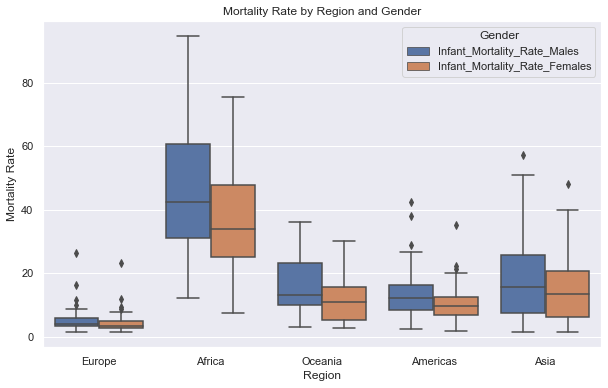

In [26]:
# a box plot for infant mortality rate males and females showing the ranges and domains by region

melted_data_mortality_rate = pd.melt(df[['Region','Infant_Mortality_Rate_Males', 'Infant_Mortality_Rate_Females']],
                   id_vars=["Region"], var_name="Gender", value_name="Mortality Rate")

sns.color_palette("rocket", as_cmap=True)
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_data_mortality_rate, x="Region", y="Mortality Rate", hue="Gender")
plt.title("Mortality Rate by Region and Gender")
plt.ylabel("Mortality Rate")
plt.xlabel("Region")

plt.savefig("Mortality-Gender_Region.png")
plt.show()


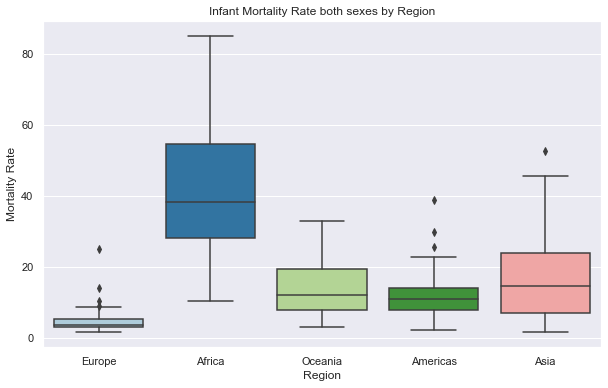

In [27]:
# a boxplot showing infant mortality rate both sexes by region

plt.figure(figsize=(10, 6))
sns.set_palette("Paired")

sns.boxplot(data=df[['Region', 'Infant_Mortality_Rate_Both_Sexes']], x="Region", y="Infant_Mortality_Rate_Both_Sexes")
plt.title("Infant Mortality Rate both sexes by Region")
plt.ylabel("Mortality Rate")
plt.xlabel("Region")
plt.savefig('Infant Mortality Rate.pdf')

plt.show()


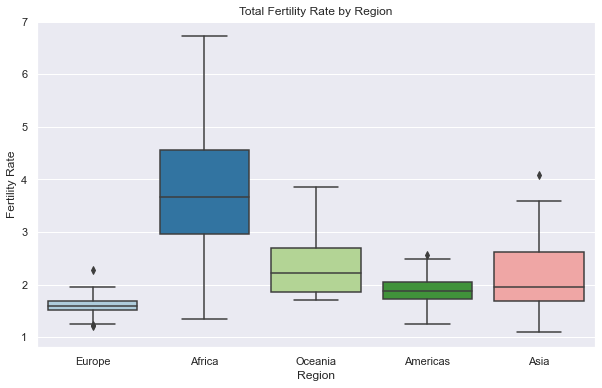

In [28]:
# boxplot showing total fertility rate by region

plt.figure(figsize=(10, 6))
sns.set_palette("Paired")
sns.boxplot(data=df[['Region', 'Total_Fertility_Rate']], x="Region", y="Total_Fertility_Rate")
plt.title("Total Fertility Rate by Region")
plt.ylabel("Fertility Rate")
plt.xlabel("Region")
plt.savefig('Total_Fertility_Rate.pdf')
plt.show()


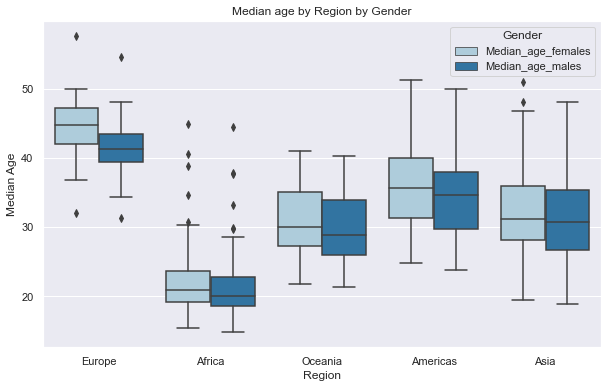

In [29]:
# a box plot for median age males and females showing the ranges and domains by region


melted_data_median_age = pd.melt(df[['Region','Median_age_females', 'Median_age_males']],
                   id_vars=["Region"], var_name="Gender", value_name="Median Age")

plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_data_median_age, x="Region", y="Median Age", hue="Gender")
plt.title("Median age by Region by Gender")
plt.ylabel("Median Age")
plt.xlabel("Region")
plt.savefig("Age_by_region.pdf")

plt.show()


## Task 2:

In [30]:
# selecting the data for Europe and Africa grouped by region

df_reg= df[df['Region'].isin(['Europe','Africa'])].reset_index(drop= True).drop(columns= ['Year'])

df_reg

,Country.Name,Region,Subregion,Median_age_both_sexes,Median_age_females,Median_age_males,Total_Fertility_Rate,Infant_Mortality_Rate_Both_Sexes,Infant_Mortality_Rate_Males,Infant_Mortality_Rate_Females
0,Albania,Europe,Southern Europe,35.8,37.2,34.3,1.55,10.5,11.6,9.5
1,Algeria,Africa,Northern Africa,28.9,29.2,28.6,2.97,18.8,19.9,17.6
2,Andorra,Europe,Southern Europe,48.1,48.1,48.1,1.46,3.4,3.5,3.3
3,Angola,Africa,Middle Africa,16.2,16.7,15.7,5.76,57.2,62.4,51.9
4,Austria,Europe,Western Europe,44.8,46.2,43.5,1.51,3.2,3.6,2.8
...,...,...,...,...,...,...,...,...,...,...
99,Uganda,Africa,Eastern Africa,16.1,16.9,15.3,5.26,29.4,32.8,26.0
100,Ukraine,Europe,Eastern Europe,45.3,50.0,41.3,1.22,9.0,10.1,7.9
101,United Kingdom,Europe,Northern Europe,40.6,41.4,39.9,1.63,3.8,4.3,3.3
102,Zambia,Africa,Eastern Africa,18.2,18.4,18.0,4.49,36.3,39.7,32.8


In [31]:
# extracing the mean of the data from europe and africa

mean_europe= df_reg[df_reg['Region']== 'Europe'].mean()
mean_africa= df_reg[df_reg['Region'] == 'Africa'].mean()
print(mean_europe,'\n \n', mean_africa)

Median_age_both_sexes               42.961224
Median_age_females                  44.465306
Median_age_males                    41.485714
Total_Fertility_Rate                 1.597551
Infant_Mortality_Rate_Both_Sexes     4.810204
Infant_Mortality_Rate_Males          5.253061
Infant_Mortality_Rate_Females        4.348980
dtype: float64 
 
 Median_age_both_sexes               22.163636
Median_age_females                  22.616364
Median_age_males                    21.703636
Total_Fertility_Rate                 3.755273
Infant_Mortality_Rate_Both_Sexes    41.070909
Infant_Mortality_Rate_Males         45.320000
Infant_Mortality_Rate_Females       36.681818
dtype: float64


In [32]:
# grouping the data by region and subregion

grouped_data= df_reg.groupby(['Region', 'Subregion'])

In [33]:
# calculating the standard deviation of the grouped data for variables

grouped_data_f= grouped_data[['Total_Fertility_Rate','Infant_Mortality_Rate_Both_Sexes',
                              'Infant_Mortality_Rate_Males','Infant_Mortality_Rate_Females']].std()
grouped_data_f

Total_Fertility_Rate  \
Region Subregion                               
Africa Eastern Africa               1.161803   
       Middle Africa                0.923446   
       Northern Africa              1.186991   
       Southern Africa              0.302275   
       Western Africa               1.199359   
Europe Eastern Europe               0.172784   
       Northern Europe              0.195679   
       Southern Europe              0.191551   
       Western Europe               0.123906   

                        Infant_Mortality_Rate_Both_Sexes  \
Region Subregion                                           
Africa Eastern Africa                          17.683922   
       Middle Africa                           18.805983   
       Northern Africa                         18.785341   
       Southern Africa                          9.839563   
       Western Africa                          14.565176   
Europe Eastern Europe                           3.445593   
       Northern Europe                          1.179122   
       Southern Europe                          5.570334   
       Western Europe                           0.600231   

                        Infant_Mortality_Rate_Males  \
Region Subregion                                      
Africa Eastern Africa                     19.543633   
       Middle Africa                      20.013371   
       Northern Africa                    20.772372   
       Southern Africa                    11.302212   
       Western Africa                     15.222765   
Europe Eastern Europe                      4.017241   
       Northern Europe                     1.291158   
       Southern Europe                     5.944125   
       Western Europe                      0.600925   

                        Infant_Mortality_Rate_Females  
Region Subregion                                       
Africa Eastern Africa                       15.943374  
       Middle Africa                        17.588238  
       Northern Africa                      16.784488  
       Southern Africa                       8.404939  
       Western Africa                       13.939554  
Europe Eastern Europe                        2.827425  
       Northern Europe                       1.067708  
       Southern Europe                       5.236411  
       Western Europe                        0.596052

In [34]:
# calculating the mean and std for Africa and Europe

grouped_mean= df_reg.groupby('Region').agg(['mean', 'std'])
grouped_mean


Median_age_both_sexes           Median_age_females            \
                        mean       std               mean       std   
Region                                                                
Africa             22.163636  5.981495          22.616364  6.070809   
Europe             42.961224  3.853938          44.465306  4.236033   

       Median_age_males           Total_Fertility_Rate            \
                   mean       std                 mean       std   
Region                                                             
Africa        21.703636  5.905238             3.755273  1.182826   
Europe        41.485714  3.644231             1.597551  0.200443   

       Infant_Mortality_Rate_Both_Sexes             \
                                   mean        std   
Region                                               
Africa                        41.070909  18.310447   
Europe                         4.810204   3.811181   

       Infant_Mortality_Rate_Males            Infant_Mortality_Rate_Females  \
                              mean        std                          mean   
Region                                                                        
Africa                   45.320000  19.782516                     36.681818   
Europe                    5.253061   4.131944                      4.348980   

                   
              std  
Region             
Africa  16.891134  
Europe   3.511061

In [35]:
# extracting the mean and std for suberions of the two regions

grouped_data_result = grouped_data[['Median_age_both_sexes', 'Total_Fertility_Rate','Infant_Mortality_Rate_Both_Sexes']].agg(['mean', 'std']).round(2)
grouped_data_result

Median_age_both_sexes       Total_Fertility_Rate        \
                                        mean   std                 mean   std   
Region Subregion                                                                
Africa Eastern Africa                  22.24  6.60                 3.60  1.16   
       Middle Africa                   19.23  2.25                 4.43  0.92   
       Northern Africa                 25.87  5.69                 3.25  1.19   
       Southern Africa                 25.50  3.01                 2.58  0.30   
       Western Africa                  21.14  6.70                 4.10  1.20   
Europe Eastern Europe                  43.10  1.92                 1.48  0.17   
       Northern Europe                 41.75  2.95                 1.73  0.20   
       Southern Europe                 42.97  4.75                 1.53  0.19   
       Western Europe                  44.68  4.75                 1.65  0.12   

                       Infant_Mortality_Rate_Both_Sexes         
                                                   mean    std  
Region Subregion                                                
Africa Eastern Africa                             37.29  17.68  
       Middle Africa                              54.43  18.81  
       Northern Africa                            25.77  18.79  
       Southern Africa                            32.52   9.84  
       Western Africa                             46.59  14.57  
Europe Eastern Europe                              6.31   3.45  
       Northern Europe                             3.34   1.18  
       Southern Europe                             6.09   5.57  
       Western Europe                              3.14   0.60

In [36]:
# calculating the valuesof the above table separately

columns_to_inculde= ['Subregion', 'Total_Fertility_Rate','Infant_Mortality_Rate_Both_Sexes',
                              'Infant_Mortality_Rate_Males','Infant_Mortality_Rate_Females']

df_europe= df_reg[df_reg['Region']== 'Europe'][columns_to_inculde].groupby('Subregion')
df_africa= df_reg[df_reg['Region']== 'Africa'][columns_to_inculde].groupby('Subregion')

df_europe_mean= df_reg[df_reg['Region']== 'Europe'][columns_to_inculde].groupby('Subregion').mean()
df_africa_mean= df_reg[df_reg['Region']== 'Africa'][columns_to_inculde].groupby('Subregion').mean()

df_europe_std= df_reg[df_reg['Region']== 'Europe'][columns_to_inculde].groupby('Subregion').std()
df_africa_std= df_reg[df_reg['Region']== 'Africa'][columns_to_inculde].groupby('Subregion').std()

In [37]:
df_europe_mean

,Total_Fertility_Rate,Infant_Mortality_Rate_Both_Sexes,Infant_Mortality_Rate_Males,Infant_Mortality_Rate_Females
Subregion,,,,
Eastern Europe,1.481000,6.310000,7.040000,5.590000
Northern Europe,1.731429,3.342857,3.664286,3.000000
Southern Europe,1.526250,6.093750,6.506250,5.650000
Western Europe,1.645556,3.144444,3.511111,2.755556


In [38]:
df_africa_mean

,Total_Fertility_Rate,Infant_Mortality_Rate_Both_Sexes,Infant_Mortality_Rate_Males,Infant_Mortality_Rate_Females
Subregion,,,,
Eastern Africa,3.601176,37.288235,41.711765,32.735294
Middle Africa,4.434444,54.433333,59.133333,49.588889
Northern Africa,3.248571,25.771429,28.385714,23.028571
Southern Africa,2.582000,32.520000,35.900000,29.040000
Western Africa,4.103529,46.594118,51.358824,41.664706


In [39]:
df_europe_std

,Total_Fertility_Rate,Infant_Mortality_Rate_Both_Sexes,Infant_Mortality_Rate_Males,Infant_Mortality_Rate_Females
Subregion,,,,
Eastern Europe,0.172784,3.445593,4.017241,2.827425
Northern Europe,0.195679,1.179122,1.291158,1.067708
Southern Europe,0.191551,5.570334,5.944125,5.236411
Western Europe,0.123906,0.600231,0.600925,0.596052


In [40]:
df_africa_std

,Total_Fertility_Rate,Infant_Mortality_Rate_Both_Sexes,Infant_Mortality_Rate_Males,Infant_Mortality_Rate_Females
Subregion,,,,
Eastern Africa,1.161803,17.683922,19.543633,15.943374
Middle Africa,0.923446,18.805983,20.013371,17.588238
Northern Africa,1.186991,18.785341,20.772372,16.784488
Southern Africa,0.302275,9.839563,11.302212,8.404939
Western Africa,1.199359,14.565176,15.222765,13.939554


In [41]:
df_europe_mean.index

Index(['Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe'],
      dtype='object', name='Subregion')

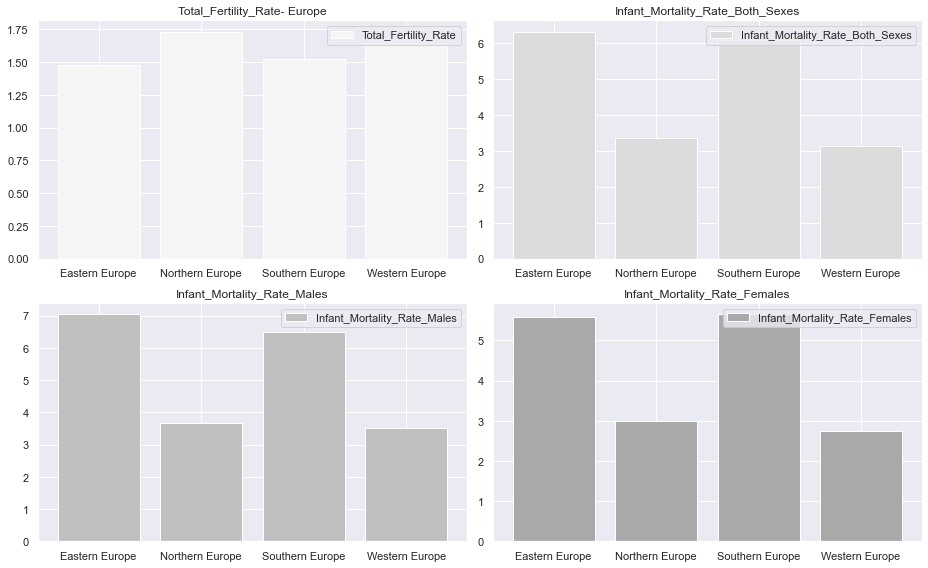

In [42]:
# plotting the important variables for Europe over subregions

subregions = ['Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe']

fig, axes = plt.subplots(2, 2, figsize=(13, 8), )

axes[0, 0].bar(subregions, df_europe_mean['Total_Fertility_Rate'], color='whitesmoke', label='Total_Fertility_Rate')
axes[0, 0].set_title('Total_Fertility_Rate- Europe')
axes[0, 0].legend()

axes[0, 1].bar(subregions, df_europe_mean['Infant_Mortality_Rate_Both_Sexes'], color='gainsboro',label='Infant_Mortality_Rate_Both_Sexes')
axes[0, 1].set_title('Infant_Mortality_Rate_Both_Sexes')
axes[0, 1].legend()

axes[1, 0].bar(subregions, df_europe_mean['Infant_Mortality_Rate_Males'], color='silver', label='Infant_Mortality_Rate_Males')
axes[1, 0].set_title('Infant_Mortality_Rate_Males')
axes[1, 0].legend()

axes[1, 1].bar(subregions, df_europe_mean['Infant_Mortality_Rate_Females'], color='darkgray', label='Infant_Mortality_Rate_Females')
axes[1, 1].set_title('Infant_Mortality_Rate_Females')
axes[1, 1].legend()

plt.tight_layout()

plt.show()


In [43]:
df_africa_mean.index

Index(['Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa',
       'Western Africa'],
      dtype='object', name='Subregion')

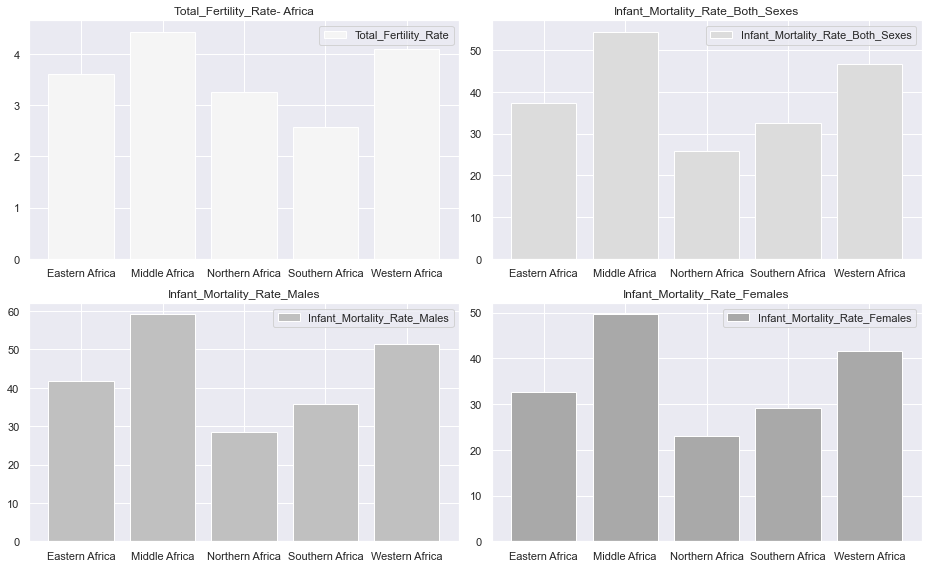

In [44]:
# plotting the important variables for Africa over subregions


subregions = ['Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa',
       'Western Africa']

fig, axes = plt.subplots(2, 2, figsize=(13, 8), )

axes[0, 0].bar(subregions, df_africa_mean['Total_Fertility_Rate'], color='whitesmoke', label='Total_Fertility_Rate')
axes[0, 0].set_title('Total_Fertility_Rate- Africa')
axes[0, 0].legend()

axes[0, 1].bar(subregions, df_africa_mean['Infant_Mortality_Rate_Both_Sexes'], color='gainsboro',label='Infant_Mortality_Rate_Both_Sexes')
axes[0, 1].set_title('Infant_Mortality_Rate_Both_Sexes')
axes[0, 1].legend()

axes[1, 0].bar(subregions, df_africa_mean['Infant_Mortality_Rate_Males'], color='silver', label='Infant_Mortality_Rate_Males')
axes[1, 0].set_title('Infant_Mortality_Rate_Males')
axes[1, 0].legend()

axes[1, 1].bar(subregions, df_africa_mean['Infant_Mortality_Rate_Females'], color='darkgray', label='Infant_Mortality_Rate_Females')
axes[1, 1].set_title('Infant_Mortality_Rate_Females')
axes[1, 1].legend()

plt.tight_layout()

plt.show()


## Task 3:

In [45]:
# extracing the data used for the task

df_corr= df[['Median_age_both_sexes', 'Infant_Mortality_Rate_Both_Sexes']]

In [46]:
# correlation by data frames

df['Median_age_both_sexes'].corr(df['Infant_Mortality_Rate_Both_Sexes']).round(3)

-0.796

In [47]:
# calculating the correlation by another package to confirm the results of previous method

coeff= scipy.stats.pearsonr(df['Median_age_both_sexes'], df['Infant_Mortality_Rate_Both_Sexes'])
coeff

(-0.796418040453732, 1.305901869803023e-50)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


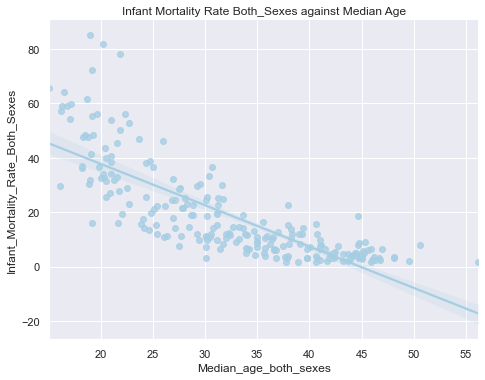

In [48]:
"""plotting scatter plot with a linear regression line(lmplot), to visualize the correlation between 
infant mortality rate for males against median age"""

sns.lmplot('Median_age_both_sexes', 'Infant_Mortality_Rate_Both_Sexes', data= df, height=5, aspect=1.33)
plt.title('Infant Mortality Rate Both_Sexes against Median Age');
plt.savefig('Infant_mortality_vs_Age.pdf');

In [49]:
df_corr.head()

,Median_age_both_sexes,Infant_Mortality_Rate_Both_Sexes
221,35.8,10.5
222,28.9,18.8
223,29.4,9.9
224,48.1,3.4
225,16.2,57.2


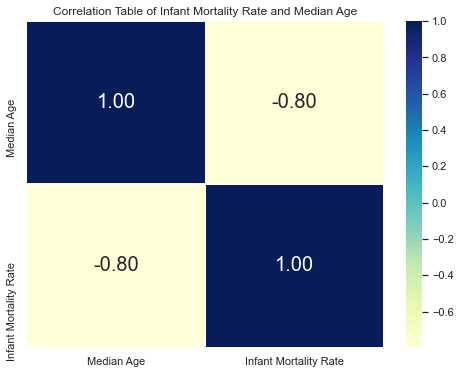

In [50]:
# showing the correlation using a heatmao

cols= ['Infant Mortality Rate', 'Median Age']
df_corr = df_corr.rename(columns={'Median_age_both_sexes': 'Median Age', 'Infant_Mortality_Rate_Both_Sexes': 'Infant Mortality Rate'})

plt.figure(figsize=(8, 6))

sns.heatmap(df_corr.corr(), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5, annot_kws={"size": 20})
plt.title('Correlation Table of Infant Mortality Rate and Median Age')
plt.savefig('Correlation.pdf')

plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


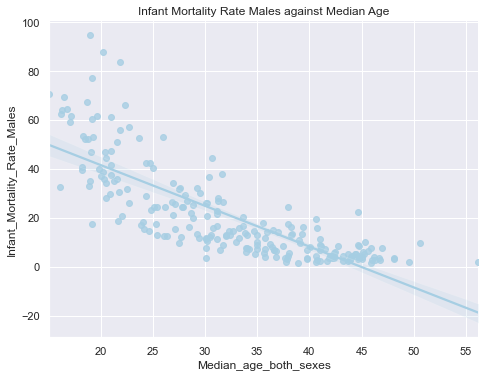

In [51]:
# lmplot for infant mortality rate for males against median age

sns.lmplot('Median_age_both_sexes', 'Infant_Mortality_Rate_Males', data= df, height=5, aspect=1.33)
plt.title('Infant Mortality Rate Males against Median Age');


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


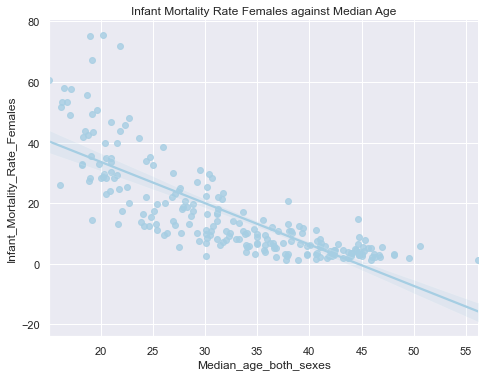

In [52]:
# lmplot for infant mortality rate for females against median age


sns.lmplot('Median_age_both_sexes', 'Infant_Mortality_Rate_Females', data= df, height=5, aspect=1.33)
plt.title('Infant Mortality Rate Females against Median Age');


# Task 4:

In [53]:
# grouping initial data by region and year, and calculating the mean and std for variables

df_grouped_years= df_init.groupby(['Region', 'Year'])

df_grouped_years_mean = df_grouped_years.mean()
df_grouped_years_std = df_grouped_years.std()
df_grouped_years_mean.reset_index(inplace= True)
df_grouped_years_std.reset_index(inplace= True)

df_grouped_years_mean.head(15)

,Region,Year,Median_age_both_sexes,Median_age_females,Median_age_males,Total_Fertility_Rate,Infant_Mortality_Rate_Both_Sexes,Infant_Mortality_Rate_Males,Infant_Mortality_Rate_Females
0,Africa,2003,19.076923,19.490385,18.657692,4.962885,72.713462,78.811538,66.415385
1,Africa,2023,22.163636,22.616364,21.703636,3.755273,41.070909,45.320000,36.681818
2,Americas,2003,27.779167,28.320833,27.197917,2.356250,19.495833,21.437500,17.454167
3,Americas,2023,34.948980,35.818367,34.071429,1.878776,12.138776,13.697959,10.512245
4,Asia,2003,25.349020,25.411765,25.092157,2.826275,33.294118,36.000000,30.441176
5,Asia,2023,31.825490,32.182353,31.239216,2.143137,16.782353,18.527451,14.945098
6,Europe,2003,37.455102,38.871429,36.024490,1.521224,7.853061,8.655102,7.018367
7,Europe,2023,42.961224,44.465306,41.485714,1.597551,4.810204,5.253061,4.348980
8,Oceania,2003,24.233333,24.609524,23.900000,3.203333,21.590476,24.004762,19.038095
9,Oceania,2023,30.304762,30.976190,29.709524,2.344286,14.100000,16.085714,12.014286


In [54]:
df['Region'].unique()

array(['Europe', 'Africa', 'Oceania', 'Americas', 'Asia'], dtype=object)

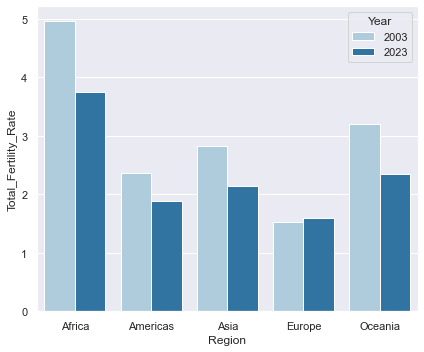

In [55]:
# plotting total fertitlity rate by region and year

plt.figure(figsize=(6, 5))

sns.set_palette("Paired")

sns.barplot(x="Region", y='Total_Fertility_Rate', hue='Year', data=df_grouped_years_mean)

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.savefig('Fertility_Year.pdf')
plt.show()



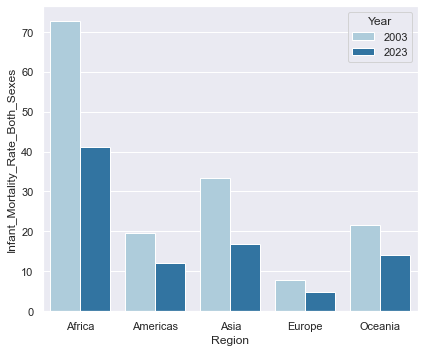

In [56]:
# plotting infant mortality rate by region and year

plt.figure(figsize=(6, 5))

sns.set_palette("Paired")

sns.barplot(x="Region", y='Infant_Mortality_Rate_Both_Sexes', hue='Year', data=df_grouped_years_mean)

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.savefig('Mortality_Year.pdf')
plt.show()



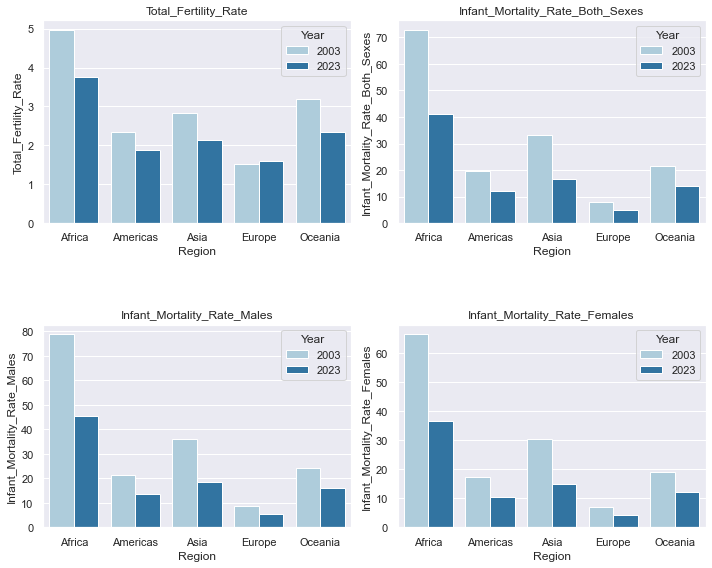

In [57]:
# plotting the mean of the some important variables grouped by year and region as subplots

columns_to_plot = ["Total_Fertility_Rate", "Infant_Mortality_Rate_Both_Sexes", "Infant_Mortality_Rate_Males", "Infant_Mortality_Rate_Females"]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.set_palette("Paired")

for i, cols in enumerate(columns_to_plot):
    row = i // 2  # Row index for the subplot
    col = i % 2   # Column index for the subplot
    ax = axs[row, col]

    sns.barplot(x="Region", y=cols, hue='Year', data=df_grouped_years_mean, ax=ax)
    ax.set_title(cols)


plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.savefig('means.pdf')
plt.show()


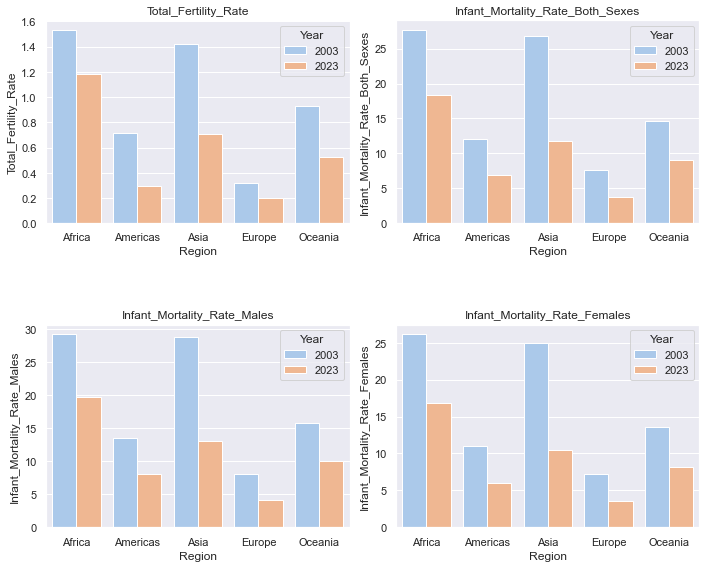

In [58]:
# plotting the std of the some important variables grouped by year and region as subplots to show variability


fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.set_palette("pastel")

for i, cols in enumerate(columns_to_plot):
    row = i // 2  # Row index for the subplot
    col = i % 2   # Column index for the subplot
    ax = axs[row, col]

    sns.barplot(x="Region", y=cols, hue='Year', data=df_grouped_years_std, ax=ax)
    ax.set_title(cols)


plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()


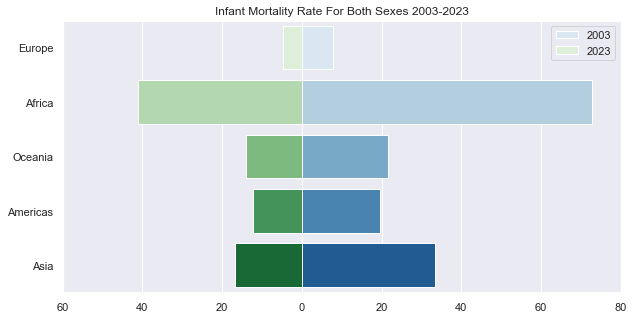

In [59]:
# barplot showing infant mortality rate by region and year

df_2003= df_init[df_init['Year'] == 2003].groupby('Region').mean()
df_2003.reset_index(inplace= True)

df_2023= df_init[df_init['Year'] == 2023].groupby('Region').mean()
df_2023.reset_index(inplace= True)

regions= ['Europe', 'Africa', 'Oceania', 'Americas', 'Asia']


x_2003 = df_2003['Infant_Mortality_Rate_Both_Sexes']
x_2023 = df_2023['Infant_Mortality_Rate_Both_Sexes'] * -1

plt.figure(figsize= (10,5))
ax1 = sns.barplot(x=x_2003, y=df_2003['Region'], order=regions, palette="Blues", label= '2003')
ax2 = sns.barplot(x=x_2023, y=df_2023['Region'], order=regions, palette="Greens", label= '2023')
plt.title('Infant Mortality Rate For Both Sexes 2003-2023')
ticks = ax2.get_xticks()
ax2.set_xticks(ticks)
ax2.set_xticklabels([int(abs(x)) for x in ticks])
plt.legend()
plt.xlabel('')
plt.ylabel('');



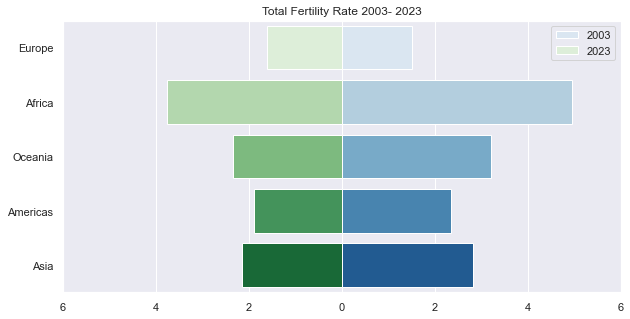

In [60]:
# barplot showing total frtility rate by region and year


x_2003 = df_2003['Total_Fertility_Rate']
x_2023 = df_2023['Total_Fertility_Rate'] * -1



plt.figure(figsize= (10,5))
ax1 = sns.barplot(x=x_2003, y=df_2003['Region'], order=regions, palette="Blues", label= '2003')
ax2 = sns.barplot(x=x_2023, y=df_2023['Region'], order=regions, palette="Greens", label= '2023')
plt.legend() 
plt.title('Total Fertility Rate 2003- 2023')
ticks = ax2.get_xticks()
ax2.set_xticks(ticks)
ax2.set_xticklabels([int(abs(x)) for x in ticks])
plt.xlabel('')
plt.ylabel('');